<a href="https://colab.research.google.com/github/ArturoCastillo90/ArturoCastillo90/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import files
uploaded = files.upload()

Saving Farmacia.csv to Farmacia (2).csv


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Farmacia.csv')

print("=" * 60)
print("DATOS ORIGINALES")
print("=" * 60)
print(df.head(30))
print(f"\nTotal de registros: {len(df)}")
print(f"\nColumnas: {df.columns.tolist()}")

DATOS ORIGINALES
   POBLACION DEL COMERCIO     NOMBRE DEL COMERCIO  Unnamed: 2  Unnamed: 3
0            CIUDAD DE ME              GIGANTE 16         NaN         NaN
1             GUADALAJARA    TELEFONICA COBRANZA1         NaN         NaN
2             GUADALAJARA    TELEFONICA COBRANZA1         NaN         NaN
3             GUADALAJARA     FARM GUADALAJARA 30         NaN         NaN
4             GUADALAJARA    SORIANA 198 AVIACION         NaN         NaN
5           GUADALAJARA J     FARM CMQ NAC UNIDAS         NaN         NaN
6           GUADALAJARA J   SRIA DE FNZ DL EDO DE         NaN         NaN
7           GUADALAJARA J   SRIA DE FNZ DL EDO DE         NaN         NaN
8           GUADALAJARA J             ROPA GEOVAN         NaN         NaN
9           GUADALAJARA J        KICKER CAR AUDIO         NaN         NaN
10          GUADALAJARA J           GRUPO GIRALDA         NaN         NaN
11          GUADALAJARA J                SU SUPER         NaN         NaN
12          GUADALAJA

In [87]:
print("=" * 60)
print("CIUDADES ÚNICAS (CON ERRORES)")
print("=" * 60)
ciudades_unicas = df['POBLACION DEL COMERCIO'].unique()
print(ciudades_unicas)
print(f"\nTotal de ciudades diferentes: {len(ciudades_unicas)}")

# Mostrar conteo por ciudad (para ver duplicados)
print("\n📊 Conteo de registros por ciudad:")
print(df['POBLACION DEL COMERCIO'].value_counts())

CIUDADES ÚNICAS (CON ERRORES)
['CIUDAD DE ME' 'GUADALAJARA' 'GUADALAJARA J' 'GUAJALAJARA J' 'MEXICO DF'
 'SN P GARZA GA' 'TLAJOMULCO JA' 'TLAQUEPAQUE' 'TLAQUEPAQUE J'
 'TORREON COAH' 'ZAPOPAN' 'ZAPOPAN JAL' nan 'TLALNEPANTLA' 'TONALA'
 'TONALA JAL' 'SN JN D LOS L' 'TALA JAL' 'ACAPULCO GRO' 'SAN LUIS POTO'
 'MORELIA MICH' 'CHAPALA JAL' 'IRAPUATO GTO' 'VILLA CORREG' 'TLAJOMULCO D'
 'TIJUANA BCN' 'BAHIA DE BAND' 'PTO VALLARTA' 'PUERTO VALLA'
 'IXTAPA ZIHUA' 'MAZATLAN SIN' 'TOLAJOMULCO D' 'GUADALAJRA JA'
 'TLAJOMULCO DE' 'MONTERREY' 'CORREGIDORA' 'GUADALAJARAR' 'GUADALUPE NL'
 'TEPIC' 'TEPIC NAY' 'SANTA CATARIN' 'LEON' 'TLAJOMULCO' 'AHUALULCO JAL'
 'MORELIA' 'SAYULA JAL' 'GUANAJUATO GT' 'SAN JOSE DEL' 'EL SALTO'
 'CULIACAN SIN' 'NAUCALPAN EM' 'ZAPOTLANEJO J' 'PUERTO VALLAR'
 'CONCEPCION DE' 'MONTERREY NL' 'ENSENADA BCN' 'CIHUATLAN JAL'
 'APODACA NL' 'GUADALAJAFA J' 'ESCOBEDO NL' 'LEON GTO' 'ZINAPECUARO M'
 'PANINDICUARO' 'FRESNILLO ZAC' 'TARETAN MICH' 'LEON DE LOS A'
 'LEON DE LOS' 'SILAO 

In [89]:
correcciones_ciudades = {
    'CIUDAD D ME': 'CIUDAD DE MEXICO',
    'CIUDAD DE ME': 'CIUDAD DE MEXICO',
    'GUADALAJRA': 'GUADALAJARA',
    'GUADALAJARA A': 'GUADALAJARA',
    'GUADALAJARA J': 'GUADALAJARA',
    'GUADALAJRA J': 'GUADALAJARA',
    'GUAJALAJARA': 'GUADALAJARA',
    'MEXICO DF': 'CIUDAD DE MEXICO'
}

# Aplicar correcciones
df['POBLACION DEL COMERCIO'] = df['POBLACION DEL COMERCIO'].replace(correcciones_ciudades)

print("=" * 60)
print("CIUDADES CORREGIDAS")
print("=" * 60)
print("Ciudades únicas:", df['POBLACION DEL COMERCIO'].unique())
print(f"\nTotal de ciudades después de corrección: {df['POBLACION DEL COMERCIO'].nunique()}")
print("\n📊 Conteo después de corrección:")
print(df['POBLACION DEL COMERCIO'].value_counts())


CIUDADES CORREGIDAS
Ciudades únicas: ['CIUDAD DE MEXICO' 'GUADALAJARA' 'GUAJALAJARA J' 'SN P GARZA GA'
 'TLAJOMULCO JA' 'TLAQUEPAQUE' 'TLAQUEPAQUE J' 'TORREON COAH' 'ZAPOPAN'
 'ZAPOPAN JAL' nan 'TLALNEPANTLA' 'TONALA' 'TONALA JAL' 'SN JN D LOS L'
 'TALA JAL' 'ACAPULCO GRO' 'SAN LUIS POTO' 'MORELIA MICH' 'CHAPALA JAL'
 'IRAPUATO GTO' 'VILLA CORREG' 'TLAJOMULCO D' 'TIJUANA BCN'
 'BAHIA DE BAND' 'PTO VALLARTA' 'PUERTO VALLA' 'IXTAPA ZIHUA'
 'MAZATLAN SIN' 'TOLAJOMULCO D' 'GUADALAJRA JA' 'TLAJOMULCO DE'
 'MONTERREY' 'CORREGIDORA' 'GUADALAJARAR' 'GUADALUPE NL' 'TEPIC'
 'TEPIC NAY' 'SANTA CATARIN' 'LEON' 'TLAJOMULCO' 'AHUALULCO JAL' 'MORELIA'
 'SAYULA JAL' 'GUANAJUATO GT' 'SAN JOSE DEL' 'EL SALTO' 'CULIACAN SIN'
 'NAUCALPAN EM' 'ZAPOTLANEJO J' 'PUERTO VALLAR' 'CONCEPCION DE'
 'MONTERREY NL' 'ENSENADA BCN' 'CIHUATLAN JAL' 'APODACA NL'
 'GUADALAJAFA J' 'ESCOBEDO NL' 'LEON GTO' 'ZINAPECUARO M' 'PANINDICUARO'
 'FRESNILLO ZAC' 'TARETAN MICH' 'LEON DE LOS A' 'LEON DE LOS' 'SILAO GTO'
 'SILAO' 'LAG

In [91]:
print("=" * 60)
print("NEGOCIOS ÚNICOS (CON ERRORES)")
print("=" * 60)
negocios_unicos = df['NOMBRE DEL COMERCIO'].unique()
for i, negocio in enumerate(sorted(negocios_unicos), 1):
    print(f"{i:2d}. {negocio}")

print(f"\nTotal de negocios diferentes: {len(negocios_unicos)}")

NEGOCIOS ÚNICOS (CON ERRORES)
 1. *** SU PAGO GRACIAS ***
 2. 3G COM
 3. 611 IVR IUSACELL
 4. 7 ELEVEN CAR MTY REY
 5. 7 ELEVEN FERROCARRIL
 6. 7 ELEVEN JESUS GARCIA
 7. 7 ELEVEN NINO OBRERO
 8. 7 ELEVEN P SUAREZ II
 9. 7 ELEVEN PATAGONIA
10. 7 ELEVEN STA MARGARITA
11. AAGM201123LG9 GAS
12. AB DISCOS
13. ABA SEG
14. ABARR LAGUNITAS
15. ABARR SUPERMDO SANTA F
16. ABARROTES CRISTINA
17. ABARROTES GAGO
18. ABARROTES MAXI
19. ACALOOPS
20. ACELLOR II
21. ACTIVACEL LPEZ COTILLA
22. ACUARIO CIRCUNVALACION
23. ADMINISTRADORA DENTAL
24. ADT
25. AERO MESOAMERICANA COM
26. AEROCALIFORNIA
27. AEROCOMIDAS
28. AEROENLACES NACIONALES
29. AEROMEXICO H2H
30. AGENC CHEVROLET REFAC
31. AIG1 MEX 01800 0064200
32. ALBARRAN 8 DE JULIO
33. ALM DE CALZADO ANGEL
34. ALRRUCCI
35. AMERCIAN STUDIOS
36. AMERICAS INCRDBL PIZZA
37. ANDREA GUADALAJARA
38. ANDREA LEON
39. ANTIGUA DE MEXICO
40. APPLE BEES JAL
41. APPLEBEE S LEON
42. AQUAWORLD LA ISLA BOUT
43. ARELI REG
44. ATLETICA JUAREZ
45. ATLETICA LEON
46. ATLETICA

In [93]:
print("=" * 60)
print("DATOS HOMOGENEIZADOS COMPLETOS")
print("=" * 60)
print(df)

# Ver un resumen
print("\n📋 Resumen de la limpieza:")
print(f"✅ Registros totales: {len(df)}")
print(f"✅ Ciudades únicas: {df['POBLACION DEL COMERCIO'].nunique()}")
print(f"✅ Negocios únicos: {df['NOMBRE DEL COMERCIO'].nunique()}")


DATOS HOMOGENEIZADOS COMPLETOS
     POBLACION DEL COMERCIO     NOMBRE DEL COMERCIO  Unnamed: 2  Unnamed: 3
0          CIUDAD DE MEXICO                 GIGANTE         NaN         NaN
1               GUADALAJARA     TELEFONICA COBRANZA         NaN         NaN
2               GUADALAJARA     TELEFONICA COBRANZA         NaN         NaN
3               GUADALAJARA    FARMACIA GUADALAJARA         NaN         NaN
4               GUADALAJARA                 SORIANA         NaN         NaN
...                     ...                     ...         ...         ...
2796            CANCUN QROO    DUFRY CANCUN LA ISLA         NaN         NaN
2797            CANCUN QROO  AQUAWORLD LA ISLA BOUT         NaN         NaN
2798                   LEON    FARM GUADALAJARA 230         NaN         NaN
2799               LEON GTO    FARM GUADALAJARA 230         NaN         NaN
2800          REYNOSA TAMPS    7 ELEVEN CAR MTY REY         NaN         NaN

[2801 rows x 4 columns]

📋 Resumen de la limpieza:
✅ Reg

In [94]:
print("=" * 60)
print("ANÁLISIS DESCRIPTIVO")
print("=" * 60)

# Conteo por ciudad
print("\n📍 DISTRIBUCIÓN POR CIUDAD:")
print("-" * 40)
ciudad_counts = df['POBLACION DEL COMERCIO'].value_counts()
print(ciudad_counts)

# Conteo por negocio
print("\n🏪 DISTRIBUCIÓN POR TIPO DE NEGOCIO:")
print("-" * 40)
negocio_counts = df['NOMBRE DEL COMERCIO'].value_counts()
print(negocio_counts)


ANÁLISIS DESCRIPTIVO

📍 DISTRIBUCIÓN POR CIUDAD:
----------------------------------------
POBLACION DEL COMERCIO
GUADALAJARA         1074
ZAPOPAN JAL          474
ZAPOPAN              201
LEON GTO             135
CIUDAD DE MEXICO     132
                    ... 
CD DELICIAS C          1
GUASAVE                1
GARCIA NL              1
CANCUN                 1
REYNOSA TAMPS          1
Name: count, Length: 114, dtype: int64

🏪 DISTRIBUCIÓN POR TIPO DE NEGOCIO:
----------------------------------------
NOMBRE DEL COMERCIO
CABLEVISION RED            115
TELCEL GUADALAJARA 7        45
*** SU PAGO GRACIAS ***     28
AXTEL                       25
AIG1 MEX 01800 0064200      20
                          ... 
WALDOS6607GDLJUANMANUE       1
VIPS GUAD VALLARTA           1
BERSHKA PZA DEL SOL          1
HOTEL ABASTOS                1
EXPENDEDORA DE BTOS II       1
Name: count, Length: 1177, dtype: int64


In [95]:
print("=" * 60)
print("TABLA CRUZADA (Ciudad x Negocio)")
print("=" * 60)
tabla_cruzada = pd.crosstab(
    df['POBLACION DEL COMERCIO'],
    df['NOMBRE DEL COMERCIO']
)
print(tabla_cruzada)

# Mostrar también los totales
print("\n📊 Totales por fila (comercios por ciudad):")
print(tabla_cruzada.sum(axis=1))
print("\n📊 Totales por columna (apariciones de cada negocio):")
print(tabla_cruzada.sum(axis=0))

TABLA CRUZADA (Ciudad x Negocio)
NOMBRE DEL COMERCIO     3G COM  611 IVR IUSACELL  ...  ZOO ROPA  ZOOLOGICO GUADAL 5
POBLACION DEL COMERCIO                            ...                              
ACAPULCO GRO                 0                 0  ...         0                   0
AGUASCALIENTE                0                 0  ...         0                   0
AHUALULCO JAL                0                 0  ...         0                   0
ALLENDE NL                   0                 0  ...         0                   0
ANAHUAC NL                   0                 0  ...         0                   0
...                        ...               ...  ...       ...                 ...
ZAPOPAN                      0                 0  ...         0                   0
ZAPOPAN JAL                  0                 0  ...         0                   0
ZAPOTLANEJO J                0                 0  ...         0                   0
ZINAPECUARO M                0             

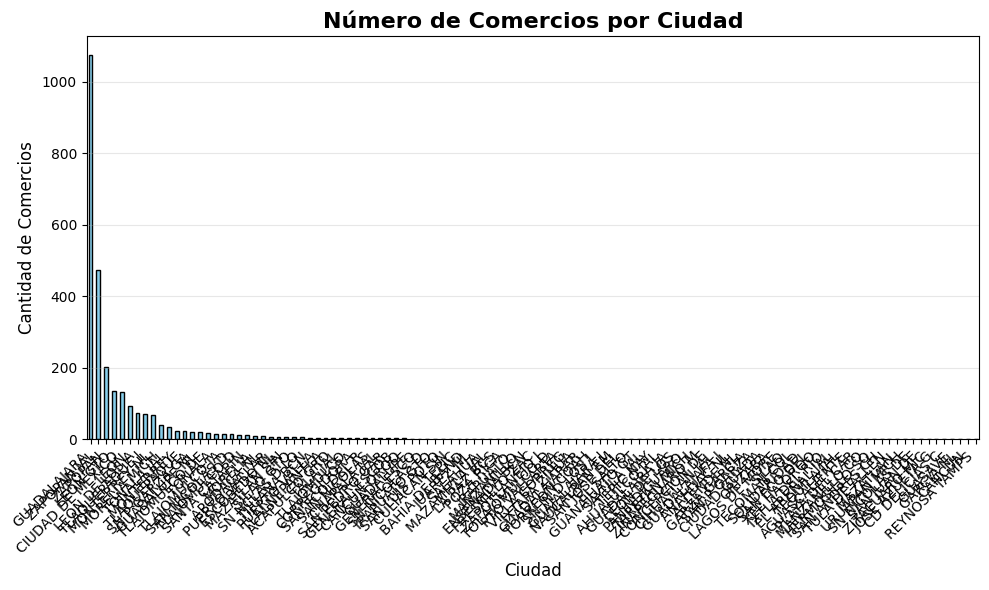

In [96]:
plt.figure(figsize=(10, 6))
ciudad_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de Comercios por Ciudad', fontsize=16, fontweight='bold')
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Cantidad de Comercios', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


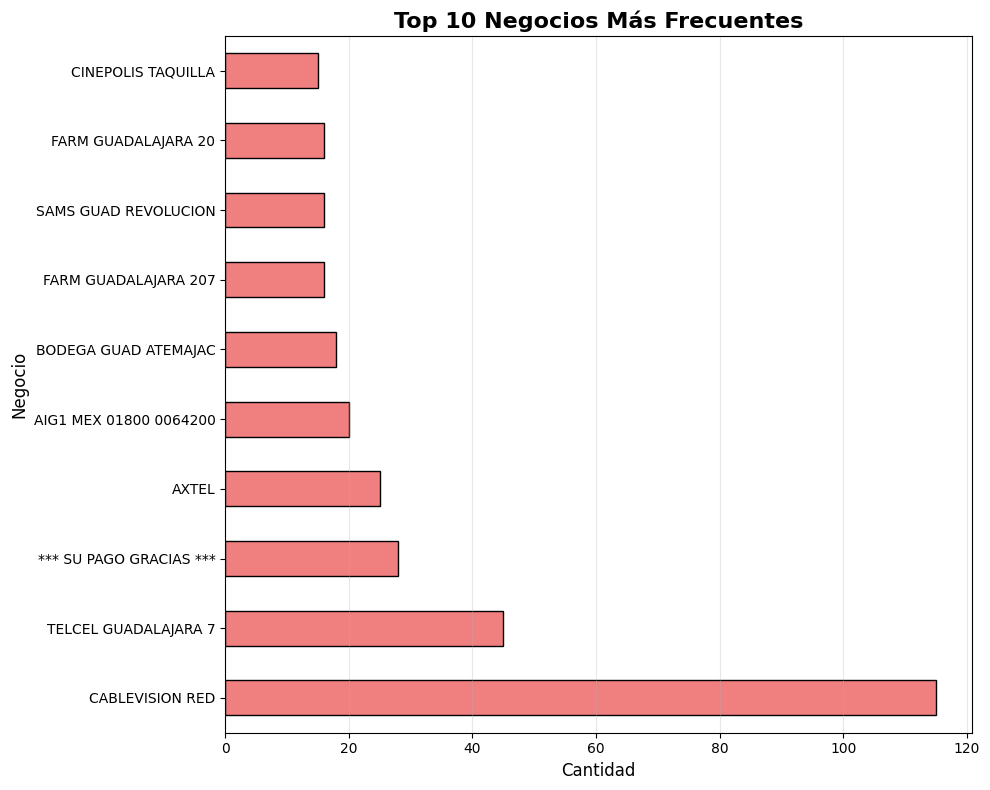

In [97]:
plt.figure(figsize=(10, 8))
negocio_counts.head(10).plot(kind='barh', color='lightcoral', edgecolor='black')
plt.title('Top 10 Negocios Más Frecuentes', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Negocio', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

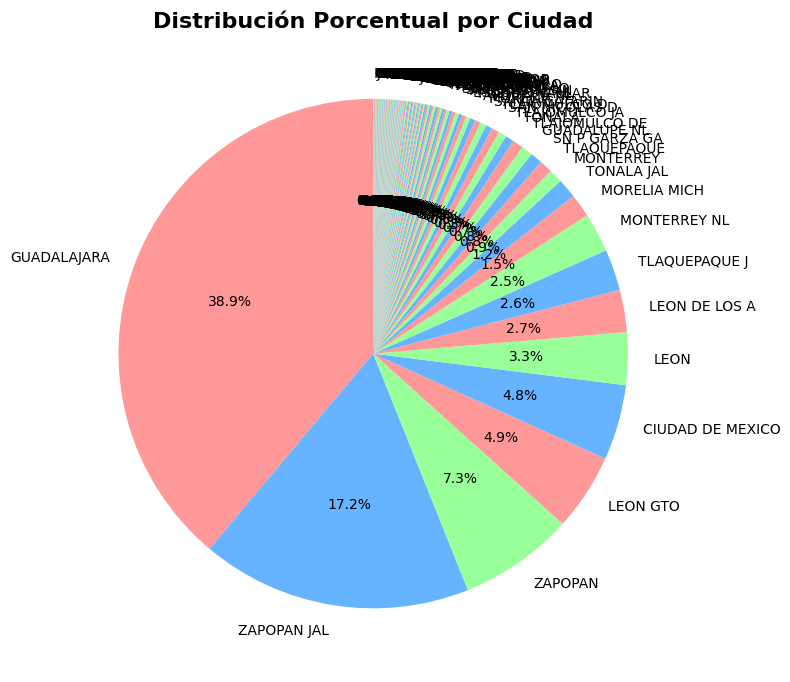

In [98]:
plt.figure(figsize=(8, 8))
plt.pie(ciudad_counts, labels=ciudad_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribución Porcentual por Ciudad', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(tabla_cruzada, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Cantidad'}, linewidths=0.5)
plt.title('Mapa de Calor: Ciudad vs Negocio', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Negocio', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()